# Arabic Preprocessing 

In [5]:
# libraries for arabert
# !pip install farasapy
# !pip install pyarabic
# !pip install fuzzysearch

In [12]:
import pandas as pd
import pyarabic.araby as araby

from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [13]:
# getting the arabic data
ar_df = pd.read_csv('others/ar_captions_full.txt', sep='\t', names=['file_name', 'caption'])
ar_df.head()

,file_name,caption
0,1000268201_693b08cb0e.jpg#0,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1000268201_693b08cb0e.jpg#1,طفلة صغيرة تتسلق الدرج إلى منزلها
2,1000268201_693b08cb0e.jpg#2,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية
3,1001773457_577c3a7d70.jpg#0,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...
4,1001773457_577c3a7d70.jpg#1,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...


In [14]:
ar_df.file_name = ar_df.file_name.apply(lambda x: x.split("#")[0])
ar_df.head()

,file_name,caption
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...


In [15]:
ar_df['split'] = 'other'
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,other
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,other
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,other
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,other
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,other


In [16]:
def split(x):
    
    if x in test_names:
        return 'test'
    elif x in val_names:
        return 'val'
    elif x in train_names:
        return 'train'
    else:
        print(x)

In [17]:
df = pd.read_json("data.json")
df.head()

,file_name,split,caption,tok_len,tokens
0,2513260012_03d33305cf.jpg,train,A black dog is running after a white dog in th...,12,"[a, black, dog, is, running, after, a, white, ..."
1,2513260012_03d33305cf.jpg,train,Black dog chasing brown dog through snow,7,"[black, dog, chasing, brown, dog, through, snow]"
2,2513260012_03d33305cf.jpg,train,Two dogs chase each other across the snowy gro...,9,"[two, dogs, chase, each, other, across, the, s..."
3,2513260012_03d33305cf.jpg,train,Two dogs play together in the snow .,7,"[two, dogs, play, together, in, the, snow]"
4,2513260012_03d33305cf.jpg,train,Two dogs running through a low lying body of w...,10,"[two, dogs, running, through, a, low, lying, b..."


In [18]:
test_names = df[df['split'] == 'test'].file_name.unique()
val_names = df[df['split'] == 'val'].file_name.unique()
train_names = df[df['split'] == 'train'].file_name.unique()
len(train_names), len(val_names), len(test_names)

(6000, 1000, 1000)

In [19]:
ar_df['split'] = ar_df['file_name'].apply(lambda row: split(row))

1155138244_859fd6e079.jpg
1155138244_859fd6e079.jpg
1155138244_859fd6e079.jpg
1468103286_96a6e07029.jpg
1468103286_96a6e07029.jpg
1468103286_96a6e07029.jpg
1479857177_9d4a6f38fd.jpg
1479857177_9d4a6f38fd.jpg
1479857177_9d4a6f38fd.jpg
1643915227_9f48068772.jpg
1643915227_9f48068772.jpg
1643915227_9f48068772.jpg
1797554350_20998753c0.jpg
1797554350_20998753c0.jpg
1797554350_20998753c0.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
1808504612_3508f3c9bb.jpg
199463720_329a802206.jpg
199463720_329a802206.jpg
199463720_329a802206.jpg
2058091220_2087270068.jpg
2058091220_2087270068.jpg
2058091220_2087270068.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2087317114_cf06df5aa5.jpg
2136455112_202c093ba4.jpg
2136455112_202c093ba4.jpg
2136455112_202c093ba4.jpg
2221818690_9003756d33.jpg
2221818690_9003756d33.jpg
2221818690_9003756d33.jpg
2319197581_94f807b204.jpg
2319197581_94f807b204.jpg
2319197581_94f807b204.jpg
236095031_5cb17dc54a.jpg
236095031_5cb17dc54a.jpg
236095031_5cb17dc

In [20]:
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [21]:
ar_df = ar_df[ar_df.split.isin(['train', 'val', 'test'])]
ar_df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [22]:
ar_df.split.unique()

array(['train', 'val', 'test'], dtype=object)

In [23]:
ar_df.to_csv("ar_data.csv", index=None)

In [24]:
df = pd.read_csv("ar_data.csv", )

In [25]:
df[df.split=='train'].shape[0], df[df.split=='val'].shape[0], df[df.split=='test'].shape[0]

(18000, 3000, 3000)

In [26]:
df[df.split=='train'].file_name.nunique(), df[df.split=='val'].file_name.nunique(), df[df.split=='test'].file_name.nunique()

(6000, 1000, 1000)

In [27]:
df.head()

,file_name,caption,split
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train


In [28]:
df.split.unique()

array(['train', 'val', 'test'], dtype=object)

### AraBert Tokenizer 

In [32]:
# !git clone https://github.com/aub-mind/arabert

In [36]:
from arabert.preprocess import ArabertPreprocessor

model_name = "aubmindlab/bert-base-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)

text = "ولن نبالغ إذا قلنا: إن 'هاتف' أو 'كمبيوتر المكتب' في زمننا هذا ضروري"
output = arabert_prep.preprocess(text)
output

[2021-07-17 14:41:01,575 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


"و+ لن نبالغ إذا قل +نا : إن ' هاتف ' أو ' كمبيوتر ال+ مكتب ' في زمن +نا هذا ضروري"

In [46]:
arabert_prep.unpreprocess(' '.join(w for w in araby.tokenize(output)))

"ولن نبالغ إذا قلنا: إن 'هاتف' أو 'كمبيوتر المكتب' في زمننا هذا ضروري"

In [48]:
all_tokens = []
token_lens = []
for i in tqdm(range(df.shape[0])):
    try:
        tokens = araby.tokenize(arabert_prep.preprocess(df.iloc[i].caption))
    except:
        print(df.iloc[i].caption)
        break
    token_len = len(tokens)
    all_tokens.append(tokens)
    token_lens.append(token_len)

100%|██████████| 24000/24000 [00:16<00:00, 1472.10it/s]


In [49]:
#file_name	split	caption	tok_len	tokens
df['tok_len'] = token_lens
df['tokens'] = all_tokens

In [50]:
df.head()

,file_name,caption,split,tok_len,tokens
0,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق إلى مسرح خشبي,train,10,"[طفل, +, ة, صغير, +, ة, تتسلق, إلى, مسرح, خشبي]"
1,1000268201_693b08cb0e.jpg,طفلة صغيرة تتسلق الدرج إلى منزلها,train,14,"[طفل, +, ة, صغير, +, ة, تتسلق, ال, +, درج, إلى..."
2,1000268201_693b08cb0e.jpg,فتاة صغيرة في ثوب وردي تذهب إلى المقصورة الخشبية,train,21,"[فتا, +, ة, صغير, +, ة, في, ثوب, وردي, تذهب, إ..."
3,1001773457_577c3a7d70.jpg,كلب أسود وكلب ثلاثي الألوان يلعبان مع بعضهما ا...,train,23,"[كلب, أسود, و, +, كلب, ثلاثي, ال, +, ألوان, يل..."
4,1001773457_577c3a7d70.jpg,كلب أسود وكلب أبيض ببقع بنية يحدقان في بعضهما ...,train,24,"[كلب, أسود, و, +, كلب, أبيض, ب, +, بقع, بني, +..."


old stats
max, min

(26, 1)

In [51]:
df.tok_len.max(), df.tok_len.min()

(60, 2)

<AxesSubplot:>

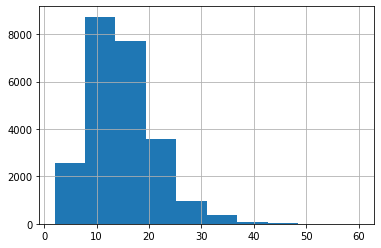

In [52]:
df.tok_len.hist()

In [53]:
df.to_json("ar_data.json")

In [54]:
df.tokens[0]

['طفل', '+', 'ة', 'صغير', '+', 'ة', 'تتسلق', 'إلى', 'مسرح', 'خشبي']